## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

## Importing Dataset (apple_sales_2024.csv)

**Columns Descriptions:**
1. State:
    * The specific state or region within a larger geographic area.
    * Examples: Chongqing, Germany, UK, Shanghai, Thailand
     
    <br>
2. Region:
   * North America
   * Europe
   * Greater China
   * Rest of Asia
   * Rest of the World

      <br>
     
3. iPhone Sales (in million units):
   * The number of iPhones sold in each state/region, measured in millions.

    <br>
    
4. iPad sales (in million units):
   * The number of iPads sold in each state/region, measured in millions.

    <br>
    
5. Mac Sales (in million units):
   * The number of Mac computers sold in each state/region, measured in millions.

     <br>
     
6. Wearables (in million units):
   * The number of wearable devices (e.g., Apple Watch, AirPods) sold in each state/region, measured in millions.

     <br>
     
7. Services Revenue (in billion $):
   * Revenue generated from Apple's digital services (e.g., iCloud, App Store, Apple Music), measured in millions.

In [5]:
df = pd.read_csv('apple_sales_2024.csv')

In [6]:
df.head()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29


## Let's explore data a little

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            1000 non-null   object 
 1   Region                           1000 non-null   object 
 2   iPhone Sales (in million units)  1000 non-null   float64
 3   iPad Sales (in million units)    1000 non-null   float64
 4   Mac Sales (in million units)     1000 non-null   float64
 5   Wearables (in million units)     1000 non-null   float64
 6   Services Revenue (in billion $)  1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


### We have 1000 rows and 7 columns in total without any missing values

In [10]:
# Basic descriptive statistics of our data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
iPhone Sales (in million units),1000.0,17.44450,7.180077,5.03,11.4475,17.130,23.7150,29.94
iPad Sales (in million units),1000.0,8.56588,3.735994,2.02,5.4325,8.695,11.7400,14.99
Mac Sales (in million units),1000.0,5.55576,2.506491,1.01,3.4700,5.550,7.7300,9.99
Wearables (in million units),1000.0,6.93550,2.951677,2.00,4.3300,6.815,9.5325,12.00
Services Revenue (in billion $),1000.0,12.44713,4.306347,5.01,8.7100,12.205,16.2525,19.92


In [11]:
df.columns

Index(['State', 'Region', 'iPhone Sales (in million units)',
       'iPad Sales (in million units)', 'Mac Sales (in million units)',
       'Wearables (in million units)', 'Services Revenue (in billion $)'],
      dtype='object')

### Let's change column names to refer them easier

In [13]:
df.columns = df.columns.str.lower().str.replace(r'\W(\W+.+)','',regex=True).str.replace(' ','_')

In [14]:
df.columns

Index(['state', 'region', 'iphone_sales', 'ipad_sales', 'mac_sales',
       'wearables', 'services_revenue'],
      dtype='object')

## Further Analysis

### Let's separate our categorical and numerical variables for further analysis

In [17]:
cat_cols = df.select_dtypes(include=['object', 'category'])
num_cols = df.select_dtypes(include=['number'])

In [18]:
cat_cols

,state,region
0,Chongqing,Greater China
1,Germany,Europe
2,UK,Europe
3,Shanghai,Greater China
4,Thailand,Rest of Asia
...,...,...
995,Mexico,Rest of World
996,Texas,North America
997,Germany,Europe
998,Shenzhen,Greater China


In [19]:
num_cols

,iphone_sales,ipad_sales,mac_sales,wearables,services_revenue
0,7.46,6.75,1.19,5.88,15.88
1,8.63,14.06,7.03,7.42,10.12
2,5.61,14.09,8.78,8.19,19.85
3,7.82,7.97,9.78,2.28,6.16
4,16.70,8.13,6.46,3.48,13.29
...,...,...,...,...,...
995,29.86,10.30,7.40,9.60,18.56
996,27.83,12.52,8.89,4.46,6.38
997,25.47,7.69,7.90,6.90,15.00
998,15.34,8.81,8.24,8.78,15.49


In [20]:
# Let's check our sales according to each Region
round(df.groupby(['region']).describe().T,2)

region                  Europe  Greater China  North America  Rest of Asia  \
iphone_sales     count  204.00         219.00         178.00        178.00   
                 mean    17.47          17.66          17.55         17.37   
                 std      7.36           7.31           6.71          7.18   
                 min      5.21           5.03           5.07          5.18   
                 25%     10.90          11.18          12.40         12.02   
                 50%     17.26          17.76          17.17         16.50   
                 75%     23.62          24.22          23.09         23.91   
                 max     29.94          29.84          29.67         29.92   
ipad_sales       count  204.00         219.00         178.00        178.00   
                 mean     8.56           8.51           9.13          8.28   
                 std      3.68           3.70           3.87          3.79   
                 min      2.02           2.34           2.07          2.04   
                 25%      5.76           5.21           5.80          4.88   
                 50%      8.82           8.17           9.54          8.61   
                 75%     11.46          11.40          12.48         11.86   
                 max     14.98          14.99          14.98         14.91   
mac_sales        count  204.00         219.00         178.00        178.00   
                 mean     5.45           5.54           5.78          5.52   
                 std      2.51           2.48           2.50          2.42   
                 min      1.08           1.17           1.01          1.02   
                 25%      3.45           3.37           3.86          3.62   
                 50%      5.56           5.57           5.88          5.28   
                 75%      7.64           7.66           8.09          7.60   
                 max      9.97           9.98           9.93          9.99   
wearables        count  204.00         219.00         178.00        178.00   
                 mean     6.63           6.92           7.15          7.28   
                 std      2.93           3.01           2.92          2.88   
                 min      2.02           2.00           2.18          2.03   
                 25%      4.07           4.28           4.81          4.95   
                 50%      6.50           6.77           6.93          7.21   
                 75%      8.99           9.60           9.68          9.81   
                 max     11.95          11.99          12.00         11.87   
services_revenue count  204.00         219.00         178.00        178.00   
                 mean    11.84          12.70          12.82         12.74   
                 std      4.19           4.23           4.46          4.25   
                 min      5.05           5.08           5.13          5.01   
                 25%      8.52           9.06           8.87          9.12   
                 50%     11.44          13.03          13.32         12.28   
                 75%     15.16          16.19          16.86         16.88   
                 max     19.85          19.90          19.88         19.89   

region                  Rest of World  
iphone_sales     count         221.00  
                 mean           17.18  
                 std             7.31  
                 min             5.05  
                 25%            10.64  
                 50%            16.84  
                 75%            23.67  
                 max            29.86  
ipad_sales       count         221.00  
                 mean            8.41  
                 std             3.66  
                 min             2.11  
                 25%             5.25  
                 50%             8.60  
                 75%            11.64  
                 max            14.99  
mac_sales        count         221.00  
                 mean            5.52  
                 std             2.61  
 

In [21]:
df.groupby('region').sum()

,state,iphone_sales,ipad_sales,mac_sales,wearables,services_revenue
region,,,,,,
Europe,GermanyUKUKItalySpainSpainGermanyUKSpainUKUKUK...,3563.12,1745.66,1111.22,1353.12,2416.30
Greater China,ChongqingShanghaiChongqingHong KongHong KongCh...,3868.28,1862.95,1212.80,1514.86,2780.72
North America,New YorkTexasCaliforniaCaliforniaCaliforniaNew...,3124.14,1625.44,1028.96,1272.92,2281.21
Rest of Asia,ThailandJapanJapanIndiaJapanSouth KoreaSouth K...,3091.50,1473.26,982.94,1296.29,2267.15
Rest of World,MexicoCanadaAustraliaAustraliaAustraliaSouth A...,3797.46,1858.57,1219.84,1498.31,2701.75


In [22]:
df.groupby('state').sum()

,region,iphone_sales,ipad_sales,mac_sales,wearables,services_revenue
state,,,,,,
Australia,Rest of WorldRest of WorldRest of WorldRest of...,642.96,393.68,238.93,267.50,541.19
Beijing,Greater ChinaGreater ChinaGreater ChinaGreater...,757.27,344.28,238.24,284.83,532.03
Brazil,Rest of WorldRest of WorldRest of WorldRest of...,844.50,405.45,240.84,328.77,523.41
California,North AmericaNorth AmericaNorth AmericaNorth A...,843.34,459.86,250.88,345.03,591.67
Canada,Rest of WorldRest of WorldRest of WorldRest of...,784.68,332.87,263.73,299.30,550.15
Chongqing,Greater ChinaGreater ChinaGreater ChinaGreater...,652.60,361.54,209.76,281.00,535.93
Florida,North AmericaNorth AmericaNorth AmericaNorth A...,479.70,228.39,164.49,196.67,324.07
France,EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...,724.19,326.43,229.74,351.72,550.11
Germany,EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...,658.35,308.73,212.28,224.01,419.05


### In this table we can see what region has the most sales and highest service revenue. But let's make it easier to see


In [24]:
# Grouping by region and excluding state for now
grouped_region = df.drop(columns='state').groupby('region').sum()

# Finding the maximum sales for each category
max_sales = grouped_region.max()

# Finding regions corresponding to the maximum sales
regions_with_max_sales = grouped_region[grouped_region == max_sales].dropna(how='all').stack()

print(regions_with_max_sales)

region                         
Greater China  iphone_sales        3868.28
               ipad_sales          1862.95
               wearables           1514.86
               services_revenue    2780.72
Rest of World  mac_sales           1219.84
dtype: float64


### As we can see the most sales for each category and highest service revenue earned in Greater China region!
### Only the most sales in MAC acquired in 'Rest of World' region!

In [26]:
# Grouping by state and excluding region for now
grouped_state = df.drop(columns='region').groupby('state').sum()

# Finding the maximum sales for each category
max_sales2 = grouped_state.max()

# Finding states corresponding to the maximum sales
states_with_max_sales = grouped_state[grouped_state == max_sales2].dropna(how='all').stack()

print(states_with_max_sales)

state                      
Hong Kong  iphone_sales        934.06
           ipad_sales          463.24
           wearables           352.83
           services_revenue    631.51
UK         mac_sales           280.13
dtype: float64


### As we can see the most sales for each category and highest service revenue obtained in Hong Kong state!
### Only the most sales in MAC acquired in UK state!

## EDA

### Since number of features are not so many we can take a look at pairplot

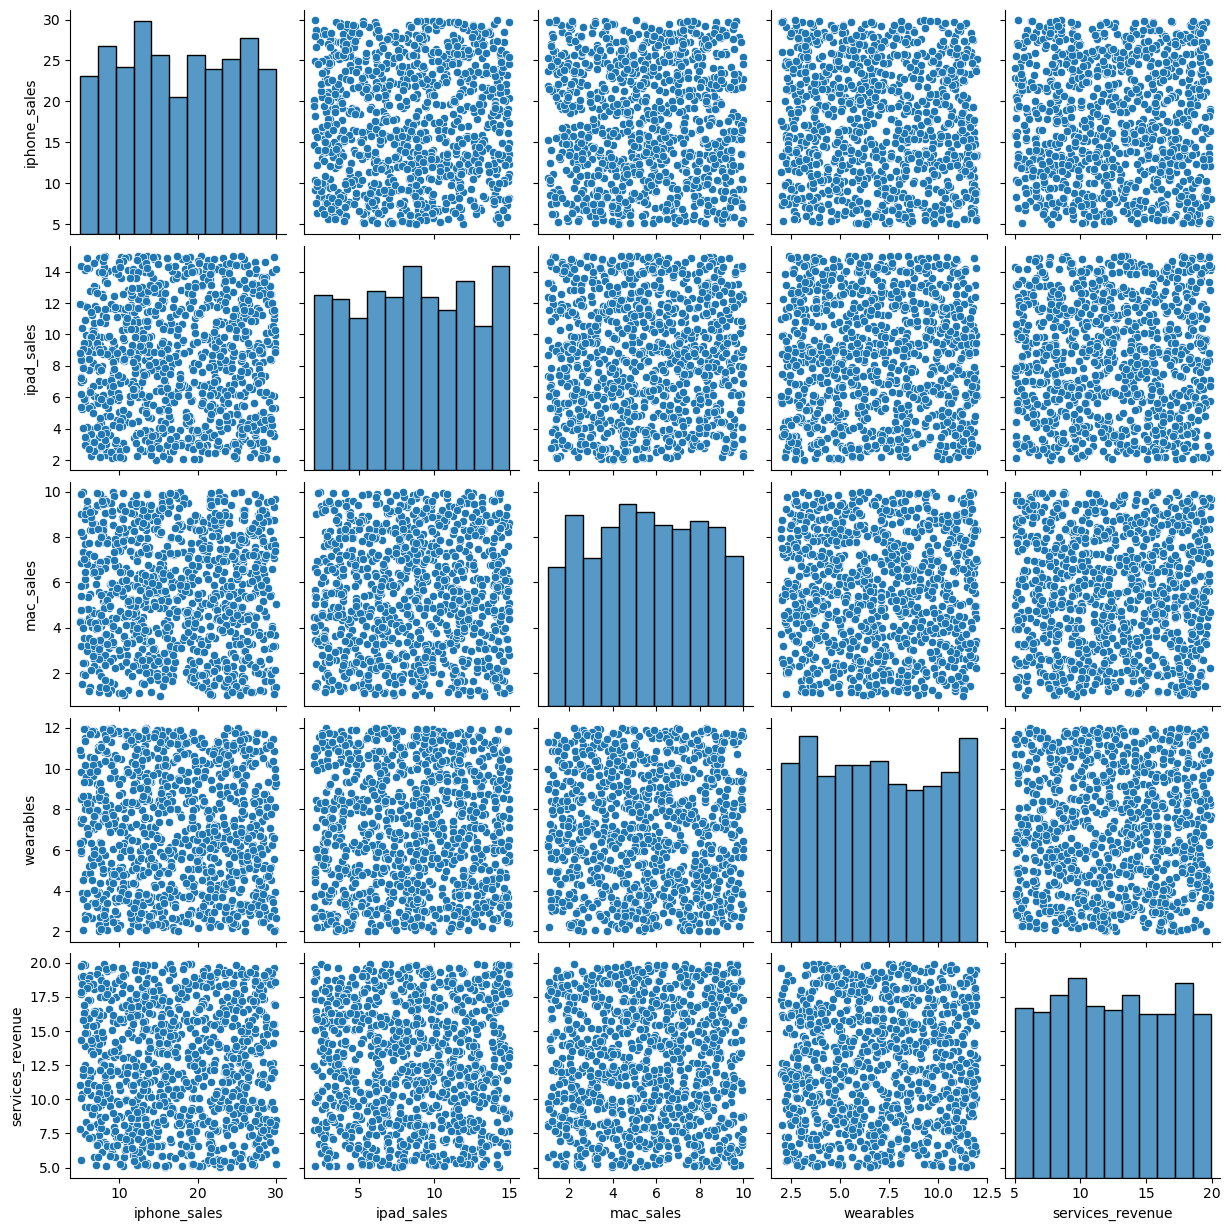

In [30]:
sns.pairplot(df)

### With this pairplot we can say there is no correlation between categories based on the scatterplots. 
### Based on the diagonal plots we can see there is not skewness. Distribution is random.

In [32]:
df.columns

Index(['state', 'region', 'iphone_sales', 'ipad_sales', 'mac_sales',
       'wearables', 'services_revenue'],
      dtype='object')

Text(0.5, 0, 'Service Revenue measured in millions')

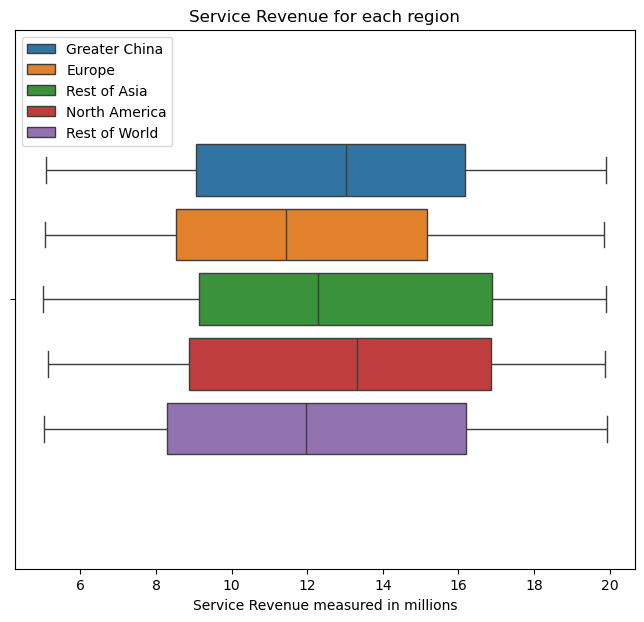

In [33]:
plt.figure(figsize=(8,7))
sns.boxplot(x = 'services_revenue',
            hue='region',
            data=df,
            gap=0.2,
            width=0.6)

plt.legend(loc = 'upper left')
plt.title('Service Revenue for each region')
plt.xlabel('Service Revenue measured in millions')

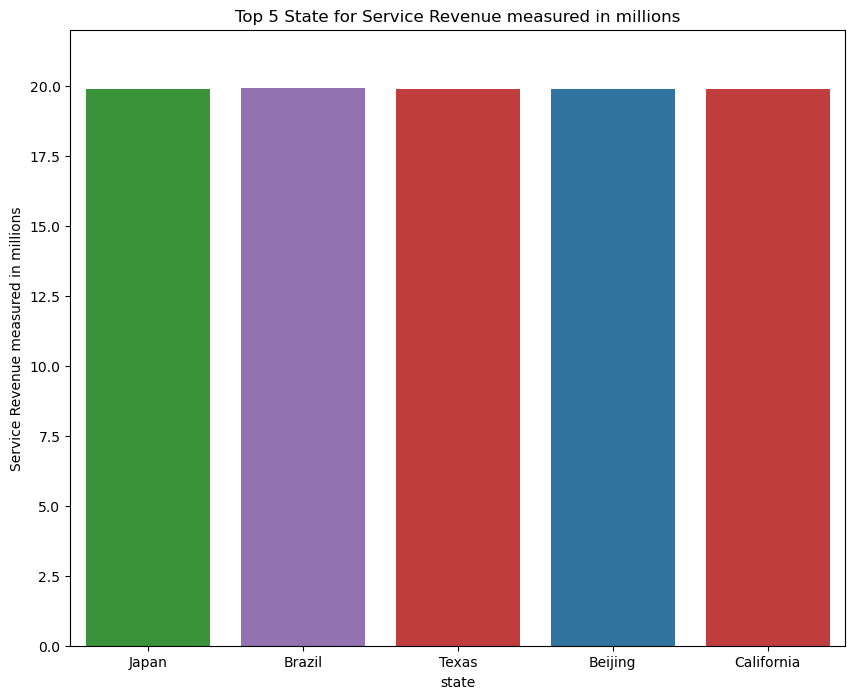

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(x=df.sort_values(by='services_revenue',ascending=False)['state'][0:5],
            y='services_revenue',
            data=df,
            hue='region',
            legend=False)

plt.title('Top 5 State for Service Revenue measured in millions')
plt.ylabel('Service Revenue measured in millions')
plt.ylim(0,22)
plt.show()

In [35]:
# Let's combine separate number of sales 
df['total_sales'] = df[['iphone_sales', 'ipad_sales', 'mac_sales', 'wearables']].sum(axis=1)

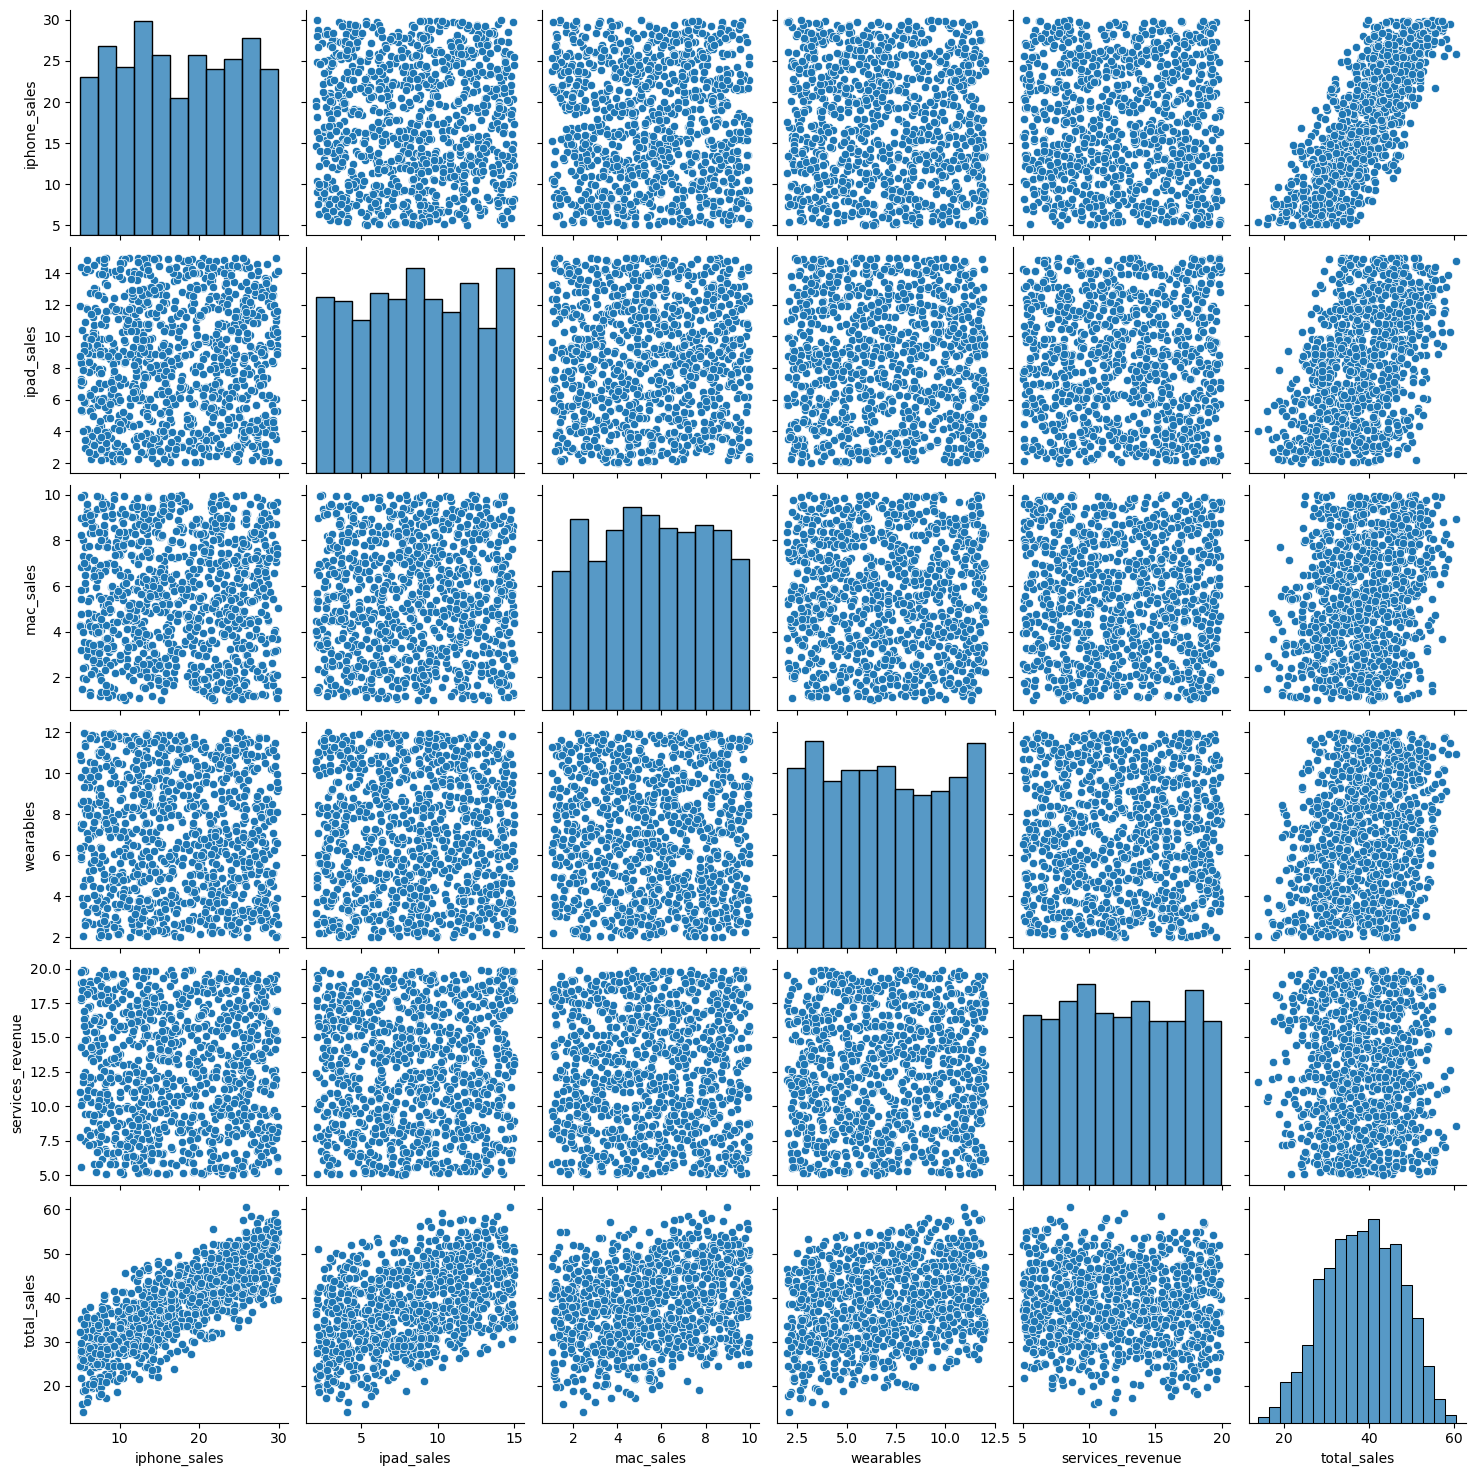

In [36]:
sns.pairplot(df)

### Since we added total_sales using other features we can see there is correlation and also different distribution

Text(0.5, 1.0, 'Distribution of Total Sales')

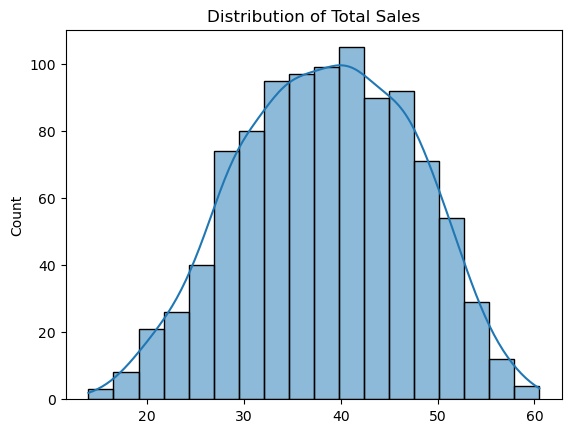

In [38]:
sns.histplot(data=df,
             x='total_sales',
             kde=True)
plt.xlabel('')
plt.title('Distribution of Total Sales')

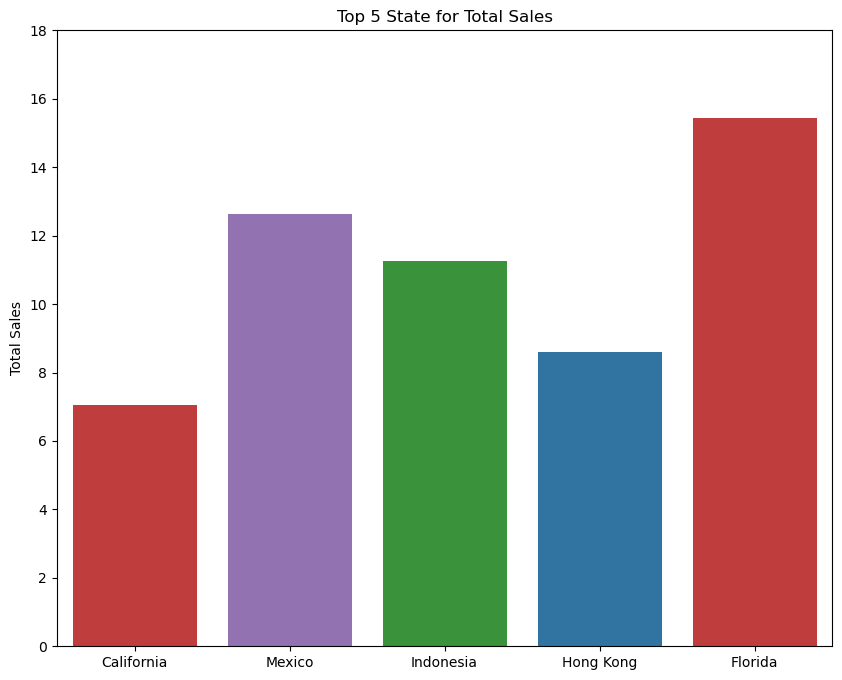

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(x=df.sort_values(by='total_sales',ascending=False)['state'][0:5],
            y='services_revenue',
            data=df,
            hue='region',
            legend=False)

plt.title('Top 5 State for Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('')
plt.ylim(0,18)
plt.show()

# Modelling

In [41]:
# Extract features (sales data)
X = df[['iphone_sales', 'ipad_sales', 'mac_sales', 'wearables']]

In [42]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

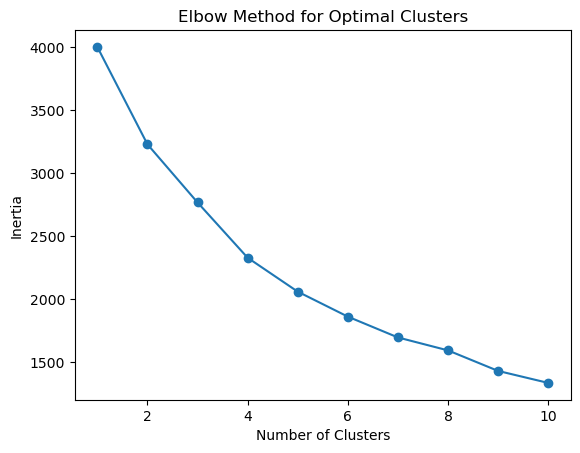

In [43]:
from sklearn.cluster import KMeans

# Calculate the sum of squared distances for different k values
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia to observe the "elbow"
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

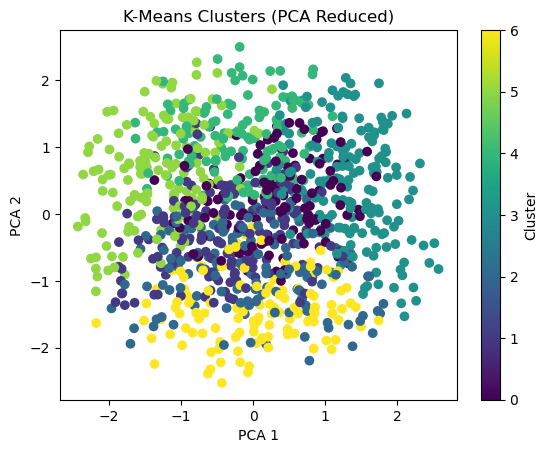

In [44]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means again on the reduced data
kmeans = KMeans(n_clusters=7, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clusters (PCA Reduced)')
plt.colorbar(label='Cluster')
plt.show()

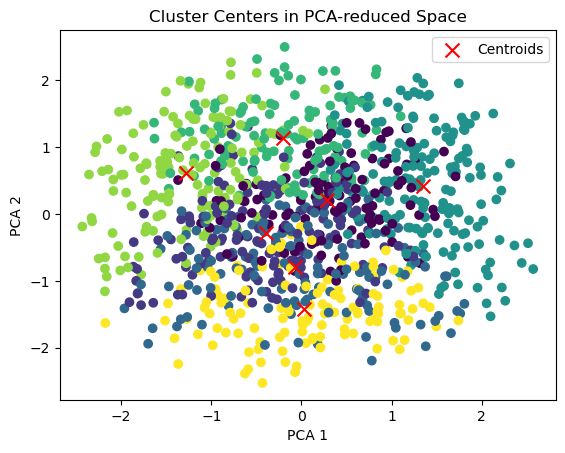

In [45]:
# Plot the centers of clusters
centers = pca.transform(kmeans.cluster_centers_)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Cluster Centers in PCA-reduced Space')
plt.legend()
plt.show()

In [46]:
print(df[['region','state','cluster']])

            region      state  cluster
0    Greater China  Chongqing        2
1           Europe    Germany        1
2           Europe         UK        5
3    Greater China   Shanghai        4
4     Rest of Asia   Thailand        4
..             ...        ...      ...
995  Rest of World     Mexico        0
996  North America      Texas        3
997         Europe    Germany        0
998  Greater China   Shenzhen        5
999  Greater China   Shanghai        6

[1000 rows x 3 columns]


### I want to classify for 3 tier ['Low','Medium','High'] so i'll bin my total_sales to 3 

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Combine sales data to get total sales for each region
df['total_sales'] = df[['iphone_sales', 'ipad_sales', 'mac_sales', 'wearables']].sum(axis=1)

# Assign performance tier based on sales
num_bins = 3 # Low, Medium, High
df['performance_tier'] = pd.qcut(df['total_sales'], num_bins, labels=False)

# Features and target
X = df[['iphone_sales', 'ipad_sales', 'mac_sales', 'wearables']]
y = df['performance_tier']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

# Predict on the test set
y_pred = model1.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Predict performance tier for all regions
df['predicted_tier1'] = model1.predict(X)
print(df[['region', 'total_sales', 'predicted_tier1']])

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        82
           1       0.69      0.73      0.71        62
           2       0.86      0.88      0.87        56

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

            region  total_sales  predicted_tier1
0    Greater China        21.28                0
1           Europe        37.14                1
2           Europe        36.67                1
3    Greater China        27.85                0
4     Rest of Asia        34.77                1
..             ...          ...              ...
995  Rest of World        57.16                2
996  North America        53.70                2
997         Europe        47.96                2
998  Greater China        41.17                1
999  Greater China        39.46                1

[1000 rows x 3 columns]


### Or i can use trained KMeans model for that

In [50]:
binned_data = pd.Series(kmeans.labels_)

In [51]:
# Features and target
X = df[['iphone_sales', 'ipad_sales', 'mac_sales', 'wearables']]
y = binned_data.copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Predict performance tier for all regions
df['predicted_tier2'] = model.predict(X)
print(df[['region', 'total_sales', 'predicted_tier2']])

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.76      0.76      0.76        25
           2       0.85      0.88      0.86        32
           3       0.79      0.90      0.84        29
           4       0.85      0.85      0.85        33
           5       0.93      0.87      0.90        31
           6       0.95      0.83      0.89        24

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

            region  total_sales  predicted_tier2
0    Greater China        21.28                2
1           Europe        37.14                1
2           Europe        36.67                5
3    Greater China        27.85                4
4     Rest of Asia        34.77                4
..             ...          ...              ...
995  Rest of World        57.16                0
996  North 

## Exporting our dataset to use it in other tools

In [53]:
df.head()

,state,region,iphone_sales,ipad_sales,mac_sales,wearables,services_revenue,total_sales,cluster,performance_tier,predicted_tier1,predicted_tier2
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88,21.28,2,0,0,2
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12,37.14,1,1,1,1
2,UK,Europe,5.61,14.09,8.78,8.19,19.85,36.67,5,1,1,5
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16,27.85,4,0,0,4
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29,34.77,4,1,1,4


In [54]:
df.to_csv('apple_sales_last2.csv',index=False)

In [98]:
df[['cluster','performance_tier','predicted_tier1','predicted_tier2']].nunique()

cluster             7
performance_tier    3
predicted_tier1     3
predicted_tier2     7
dtype: int64

In [104]:
y_true = df['performance_tier']
y_pred1 = df['predicted_tier1']

# Evaluation for predicted_tier1
print("🎯 Tier 1 Prediction Performance")
print("Accuracy:", accuracy_score(y_true, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred1))
print("Classification Report:\n", classification_report(y_true, y_pred1))


🎯 Tier 1 Prediction Performance
Accuracy: 0.962
Confusion Matrix:
 [[320  14   0]
 [  9 316   8]
 [  1   6 326]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       334
           1       0.94      0.95      0.94       333
           2       0.98      0.98      0.98       333

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [110]:
import joblib

# After training your model
joblib.dump(model1, "dtree_classifier.pkl")

['dtree_classifier.pkl']

In [108]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']